In [594]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn.metrics.pairwise import cosine_similarity

In [595]:
df=pd.read_csv("D:\happytal\envoi_exercice\order_data.csv",index_col=0)

In [596]:
df['product_rating']=df['product_rating'].fillna(3)
df['product_rating']=df['product_rating'].astype('int')

In [597]:
df['product_price'] = df['product_price'].str.replace('€', '')
df['product_price'] = df['product_price'].str.replace(',', '.')
df['product_price'] = df['product_price'].str.replace(' ', '')
df['product_price']=df['product_price'].astype('float')
df["product_price_cat"]=pd.cut(df['product_price'],bins=[0,10,20,30],labels=['0-10','10-20','20-30'])

In [598]:
df['patient_birthdate']= pd.to_datetime(df['patient_birthdate'])
df['patient_entry_date']= pd.to_datetime(df['patient_entry_date'])

In [599]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['age'] = df['patient_birthdate'].apply(calculate_age)

df["age_cat"]=pd.cut(df['age'],bins=[0,20,40,60,80,100],labels=['0-20','20-40','40-60','60-80',"80-100"])

In [600]:
df["patient_stay_duration_cat"]=pd.cut(df['patient_stay_duration'],bins=[0,10,20,30,40],labels=['0-10','10-20','20-30','30-40'])

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   559 non-null    int64         
 1   patient_first_name         559 non-null    object        
 2   patient_last_name          559 non-null    object        
 3   patient_email              559 non-null    object        
 4   patient_gender             559 non-null    object        
 5   patient_birthdate          559 non-null    datetime64[ns]
 6   patient_ip_address         497 non-null    object        
 7   patient_entry_date         559 non-null    datetime64[ns]
 8   patient_stay_duration      559 non-null    int64         
 9   functional_unit_id         559 non-null    int64         
 10  product_rating             559 non-null    int32         
 11  product_category           559 non-null    object        
 12  product_

In [602]:
df.head()

,order_id,patient_first_name,patient_last_name,patient_email,patient_gender,patient_birthdate,patient_ip_address,patient_entry_date,patient_stay_duration,functional_unit_id,product_rating,product_category,product_price,product_id,product_price_cat,age,age_cat,patient_stay_duration_cat
0,217,Dorthy,Greenhow,dgreenhow60@google.com.au,Female,1985-05-20,NaN,2019-01-28,14,1,2,Electronics,20.80,40,20-30,36,20-40,10-20
1,310,Aharon,Kasbye,akasbye8l@google.com.au,Male,1996-09-28,106.167.86.195,2019-01-21,15,3,1,Music,26.62,101,20-30,24,20-40,10-20
2,370,Kiah,Clemens,kclemensa9@flickr.com,Female,1981-10-13,69.131.56.24,2019-12-01,5,1,4,Games,9.54,53,0-10,39,20-40,0-10
3,474,Norton,Philson,nphilsond5@narod.ru,Male,1930-08-26,NaN,2019-01-15,11,3,1,Health,7.36,70,0-10,90,80-100,10-20
4,5,Jany,Buessen,jbuessen4@vimeo.com,Female,1939-08-04,122.207.31.30,2019-01-16,25,3,3,Health,24.03,72,20-30,81,80-100,20-30


<AxesSubplot:>

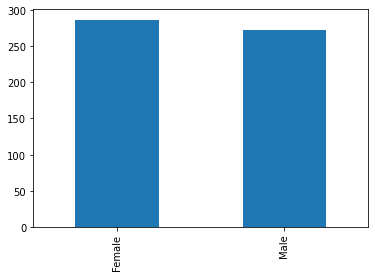

In [603]:
df["patient_gender"].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'patient_stay_duration'}>]],
      dtype=object)

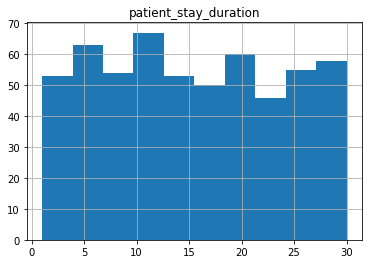

In [604]:
df.hist("patient_stay_duration")

array([[<AxesSubplot:title={'center':'product_rating'}>]], dtype=object)

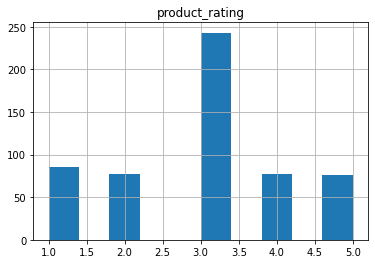

In [605]:
df.hist("product_rating")

<AxesSubplot:>

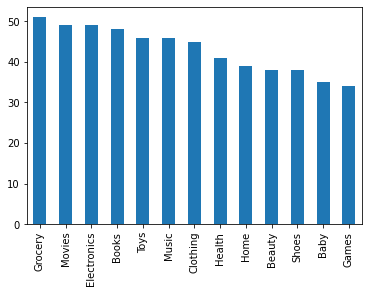

In [606]:
df["product_category"].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'product_price'}>]], dtype=object)

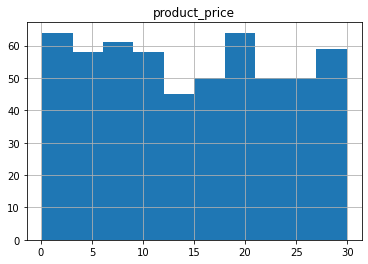

In [607]:
df.hist("product_price")

array([[<AxesSubplot:title={'center':'product_id'}>]], dtype=object)

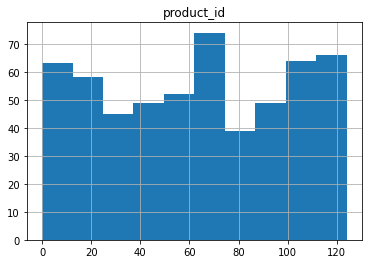

In [608]:
df.hist("product_id")

array([[<AxesSubplot:title={'center':'functional_unit_id'}>]],
      dtype=object)

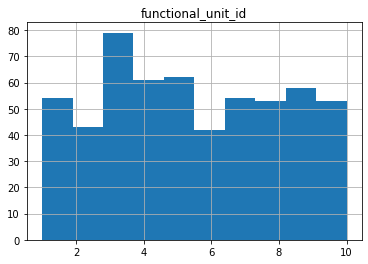

In [609]:
df.hist("functional_unit_id")

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

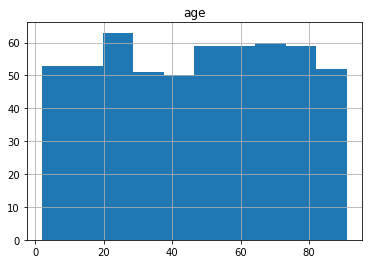

In [610]:
df.hist("age")

array([[<AxesSubplot:title={'center':'patient_entry_date'}>]],
      dtype=object)

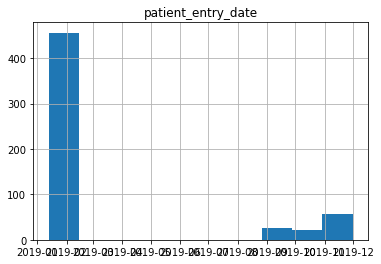

In [611]:
df.hist("patient_entry_date")

In [612]:
df=pd.get_dummies( data=df, prefix_sep='_',  columns=["product_category","patient_gender","age_cat","patient_stay_duration_cat","product_price_cat"], drop_first=False)

In [613]:
df_final= df.drop(columns=["age","patient_stay_duration","product_price","order_id","patient_first_name","patient_last_name","patient_birthdate","patient_ip_address","patient_entry_date","functional_unit_id"])


In [614]:
df_final.head()

,patient_email,product_rating,product_id,product_category_Baby,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Games,product_category_Grocery,...,age_cat_40-60,age_cat_60-80,age_cat_80-100,patient_stay_duration_cat_0-10,patient_stay_duration_cat_10-20,patient_stay_duration_cat_20-30,patient_stay_duration_cat_30-40,product_price_cat_0-10,product_price_cat_10-20,product_price_cat_20-30
0,dgreenhow60@google.com.au,2,40,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,akasbye8l@google.com.au,1,101,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,kclemensa9@flickr.com,4,53,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,nphilsond5@narod.ru,1,70,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,jbuessen4@vimeo.com,3,72,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [615]:
df_final['User_ID'] = df_final.patient_email.astype('category').cat.codes
identifiant=df_final[["patient_email","User_ID"]]
identifiant.to_csv("D:\happytal\envoi_exercice\email_to_Id.csv")

In [616]:
userToProduct=df_final[["patient_email",'User_ID','product_id',"product_rating"]]
userToProduct
userToProduct.to_csv("D:\\happytal\\envoi_exercice\\userToProduct.csv")

In [617]:
product= df_final.drop(columns=["patient_email","User_ID","product_rating"])
product["count"]=1
product = product.groupby(['product_id']).sum()
product=product.div(product["count"], axis=0)
product=product.drop(columns=["count"])
product.head()
product.to_excel("D:\happytal\envoi_exercice\product.xls")

<ipython-input-617-824388c4151f>:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  product.to_excel("D:\happytal\envoi_exercice\product.xls")


In [663]:
product.head()

,product_category_Baby,product_category_Beauty,product_category_Books,product_category_Clothing,product_category_Electronics,product_category_Games,product_category_Grocery,product_category_Health,product_category_Home,product_category_Movies,...,age_cat_40-60,age_cat_60-80,age_cat_80-100,patient_stay_duration_cat_0-10,patient_stay_duration_cat_10-20,patient_stay_duration_cat_20-30,patient_stay_duration_cat_30-40,product_price_cat_0-10,product_price_cat_10-20,product_price_cat_20-30
product_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.333333,0.000000,0.333333,0.166667,0.500000,0.0,0.166667,0.333333,0.500000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.285714,0.285714,0.571429,0.285714,0.142857,0.0,0.142857,0.428571,0.428571
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.400000,0.000000,0.400000,0.400000,0.200000,0.0,0.200000,0.400000,0.400000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.222222,0.222222,0.222222,0.333333,0.333333,0.333333,0.0,0.666667,0.222222,0.111111
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250000,0.125000,0.000000,0.500000,0.250000,0.250000,0.0,0.375000,0.250000,0.375000


In [670]:
cosSimilarity_matrix = cosine_similarity(product,product)
cosSimilarity_matrix_df= pd.DataFrame(cosSimilarity_matrix,index=product.index)
cosSimilarity_matrix_df.columns = product.index.values.tolist()
cosSimilarity_matrix_df.head(10)
cosSimilarity_matrix_df.to_csv("D:\happytal\envoi_exercice\cosSimMatrix.csv")

In [671]:
cosSimilarity_matrix_df

,0,1,2,3,4,10,11,12,13,14,...,110,111,112,113,114,120,121,122,123,124
product_id,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.928192,0.869180,0.894675,0.928013,0.540694,0.504156,0.481824,0.436694,0.482952,...,0.554479,0.573299,0.501070,0.587707,0.511728,0.572388,0.538931,0.492017,0.504339,0.514110
1,0.928192,1.000000,0.830935,0.896209,0.912685,0.435115,0.477577,0.431141,0.521248,0.439407,...,0.552579,0.521798,0.487332,0.507796,0.520174,0.484862,0.491341,0.449342,0.520093,0.497710
2,0.869180,0.830935,1.000000,0.812195,0.844499,0.504872,0.556806,0.578219,0.532870,0.521939,...,0.513936,0.398640,0.534300,0.411577,0.597281,0.521939,0.527747,0.565301,0.518273,0.528625
3,0.894675,0.896209,0.812195,1.000000,0.918613,0.499231,0.546363,0.475600,0.490206,0.567096,...,0.517038,0.561765,0.466568,0.525640,0.478179,0.519341,0.518230,0.477206,0.545184,0.441188
4,0.928013,0.912685,0.844499,0.918613,1.000000,0.472997,0.533007,0.451515,0.425551,0.509097,...,0.560607,0.572607,0.452740,0.512675,0.520166,0.509097,0.526715,0.528546,0.534944,0.461505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.572388,0.484862,0.521939,0.519341,0.509097,0.530318,0.524104,0.519170,0.450564,0.541353,...,0.548408,0.574261,0.551261,0.573135,0.505493,1.000000,0.971426,0.801419,0.912510,0.812965
121,0.538931,0.491341,0.527747,0.518230,0.526715,0.518423,0.539944,0.515682,0.468701,0.541387,...,0.574115,0.542004,0.594895,0.499580,0.505296,0.971426,1.000000,0.815221,0.960226,0.835570
122,0.492017,0.449342,0.565301,0.477206,0.528546,0.534001,0.560203,0.539449,0.459020,0.510581,...,0.483190,0.418701,0.406802,0.416212,0.573190,0.801419,0.815221,1.000000,0.879458,0.893421
